Optimal Allocation:
Equity: 75.49%
Fixed Income: 1.90%
Gold: 0.20%
Real Estate: 22.42%


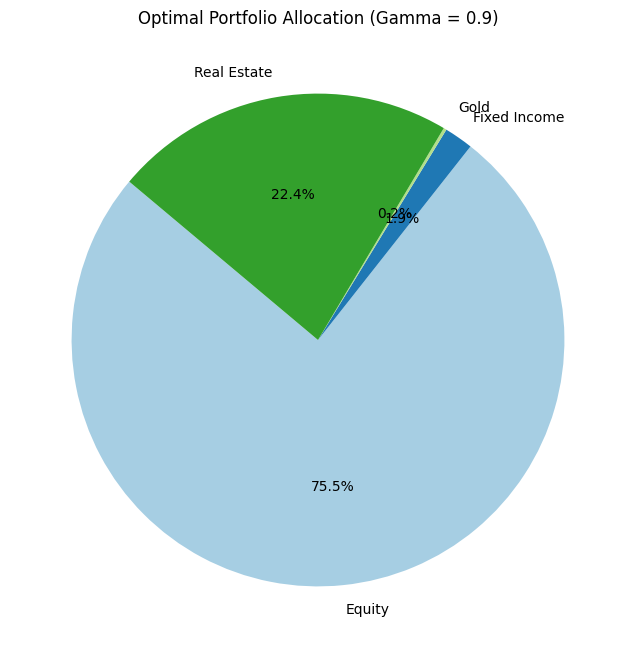

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define parameters for four asset classes
n_asset_classes = 4
asset_classes = ['Equity', 'Fixed Income', 'Gold', 'Real Estate']
mean_returns = np.array([0.12, 0.08, 0.06, 0.10])  # Expected annual returns
volatilities = np.array([0.20, 0.05, 0.15, 0.12])  # Annual volatilities

correlation_matrix = np.array([
    [1.0, 0.3, 0.2, 0.4],  # Equity correlations
    [0.3, 1.0, 0.1, 0.2],  # Fixed Income correlations
    [0.2, 0.1, 1.0, 0.3],  # Gold correlations
    [0.4, 0.2, 0.3, 1.0]   # Real Estate correlations
])

cov_matrix = np.outer(volatilities, volatilities) * correlation_matrix  # Covariance matrix

# Step 2: Simulate portfolio returns for different allocations
n_allocations = 10000  # Number of random portfolio allocations
allocations = np.random.dirichlet(np.ones(n_asset_classes), size=n_allocations)  # Random allocations summing to 1
gamma = 0.9  # CRRA coefficient
initial_wealth = 1_000_000  # Initial wealth in INR
n_years = 10  # Investment horizon in years
n_simulations = 10000  # Number of return simulations

expected_utilities = []  # Store expected utilities for each allocation

for allocation in allocations:
    # Calculate portfolio mean return and volatility
    portfolio_mean_return = np.dot(allocation, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(allocation, np.dot(cov_matrix, allocation)))

    # Simulate terminal wealth over n_years using geometric Brownian motion
    simulated_terminal_wealth = initial_wealth * np.exp(
        (portfolio_mean_return - 0.5 * portfolio_volatility ** 2) * n_years +
        portfolio_volatility * np.sqrt(n_years) * np.random.randn(n_simulations)
    )
    
    # Calculate CRRA utility for each simulation (gamma = 0.9 case)
    if gamma != 1:
        utility = (simulated_terminal_wealth ** (1 - gamma)) / (1 - gamma)
    else:
        utility = np.log(simulated_terminal_wealth)
    
    # Store the expected utility (mean of simulated utilities)
    expected_utilities.append(np.mean(utility))

# Step 3: Find the optimal allocation
optimal_index = np.argmax(expected_utilities)
optimal_allocation = allocations[optimal_index]

optimal_allocation_dict = {asset_classes[i]: optimal_allocation[i] for i in range(n_asset_classes)}

# Display the optimal allocation
print("Optimal Allocation:")
for asset, alloc in optimal_allocation_dict.items():
    print(f"{asset}: {alloc:.2%}")

# Step 4: Plot the optimal allocation as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(optimal_allocation, labels=asset_classes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Optimal Portfolio Allocation (Gamma = 0.9)')
plt.show()
